<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [1]:
# Utilice este espacio para escribir el código.
# Cargamos las librerías a utilizar
import pandas as pd
import numpy as np

pd.read_csv('data/artists.dat', nrows=3 )

,id\tname\turl\tpictureURL
0,1\tMALICE MIZER\thttp://www.last.fm/music/MALI...
1,2\tDiary of Dreams\thttp://www.last.fm/music/D...
2,3\tCarpathian Forest\thttp://www.last.fm/music...


In [2]:
# Cargamos los datos de los artistas
a_cols = ['artistID', 'artistNAME']

artists = pd.read_csv('data/artists.dat', sep='\t', usecols=[0, 1], header=0, names=a_cols)
#encoding='latin-1')

artists.head()

,artistID,artistNAME
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [3]:
# Cargamos los datos de usuarios_artistas
ua_cols = ['userID','artistID', 'nro_reproducciones']

user_artists = pd.read_csv('data/user_artists.dat', sep='\t', header=0, names=ua_cols)
#encoding='latin-1')

user_artists.head()

,userID,artistID,nro_reproducciones
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
# Unir las bases
df = pd.merge(user_artists, artists, on='artistID', how='inner')
df.head()

,userID,artistID,nro_reproducciones,artistNAME
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran


In [5]:
df.shape

(92834, 4)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [6]:
# Utilice este espacio para escribir el código.
n_usuarios = df['userID'].nunique()
print('Número de usuarios en la base: ',n_usuarios)
n_artistas = df['artistID'].nunique()
print('Número de artistas en la base: ',n_artistas)

Número de usuarios en la base:  1892
Número de artistas en la base:  17632


In [7]:
# Probabilidad sin ponderar
prob_sin_ponderar_df = df['artistID'].value_counts().reset_index() # contamos el numero de veces que aparece un artista
prob_sin_ponderar_df.columns = ['artistID', 'prob_sin_ponderar']
prob_sin_ponderar_df['prob_sin_ponderar'] = prob_sin_ponderar_df['prob_sin_ponderar']/len(df)

In [8]:
prob_sin_ponderar_df['prob_sin_ponderar'].sum()

1.0

In [9]:
prob_sin_ponderar_df.head()

,artistID,prob_sin_ponderar
0,89,0.006582
1,289,0.005623
2,288,0.005214
3,227,0.005171
4,300,0.005095


In [11]:
# Probabiliada ponderada ORIGINAL
total_reproducciones = df['nro_reproducciones'].sum()  # Total reproducciones
reproducciones_per_artist = df.groupby('artistID')['nro_reproducciones'].sum() # Reproducciones por artista
prob_ponderada = reproducciones_per_artist / total_reproducciones  # Distribución de probabilidad ponderada
prob_ponderada_df = prob_ponderada.reset_index(name='prob_ponderada')

In [12]:
prob_ponderada_df['prob_ponderada'].sum()

1.0

In [13]:
# Unir las distribuciones con el artists df
artists = artists.merge(prob_sin_ponderar_df, on='artistID', how='left')
artists = artists.merge(prob_ponderada_df, on='artistID', how='left')

artists.head()

,artistID,artistNAME,prob_sin_ponderar,prob_ponderada
0,1,MALICE MIZER,0.000032,0.000011
1,2,Diary of Dreams,0.000129,0.000116
2,3,Carpathian Forest,0.000032,0.000011
3,4,Moi dix Mois,0.000022,0.000008
4,5,Bella Morte,0.000022,0.000013


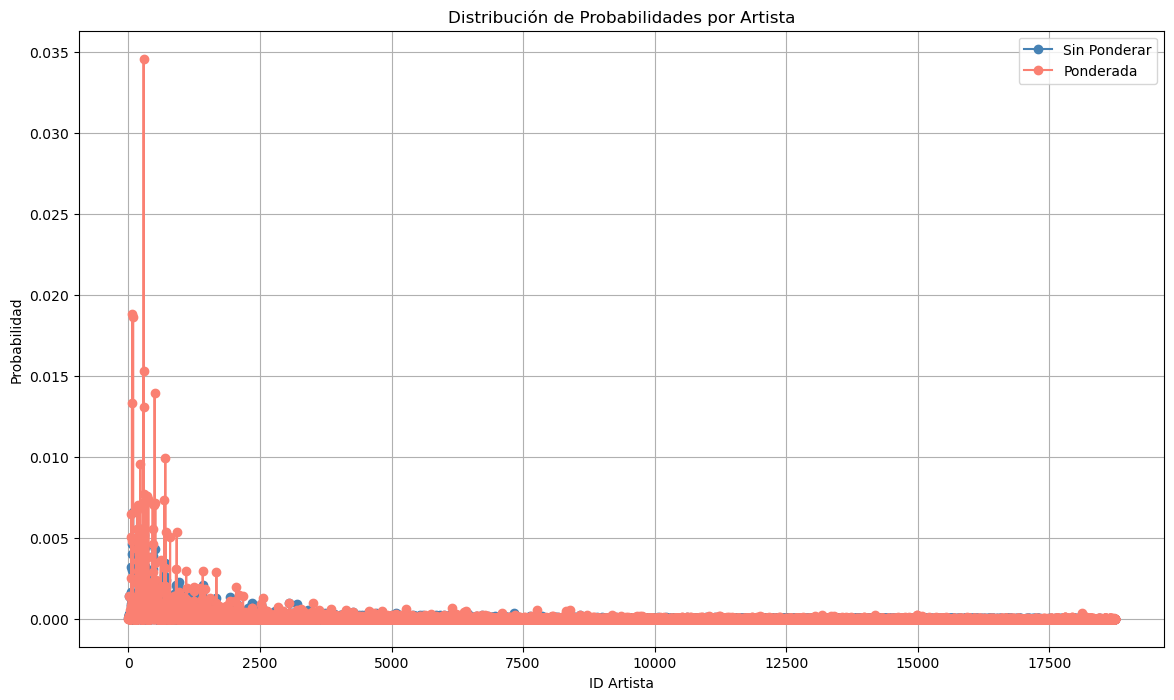

In [14]:
# Comparación probabilidades
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(artists['artistID'], artists['prob_sin_ponderar'], marker='o', label='Sin Ponderar', color='steelblue')
plt.plot(artists['artistID'], artists['prob_ponderada'], marker='o', label='Ponderada', color='salmon')

plt.xlabel('ID Artista')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades por Artista')
plt.legend()
plt.grid(True)
plt.show()

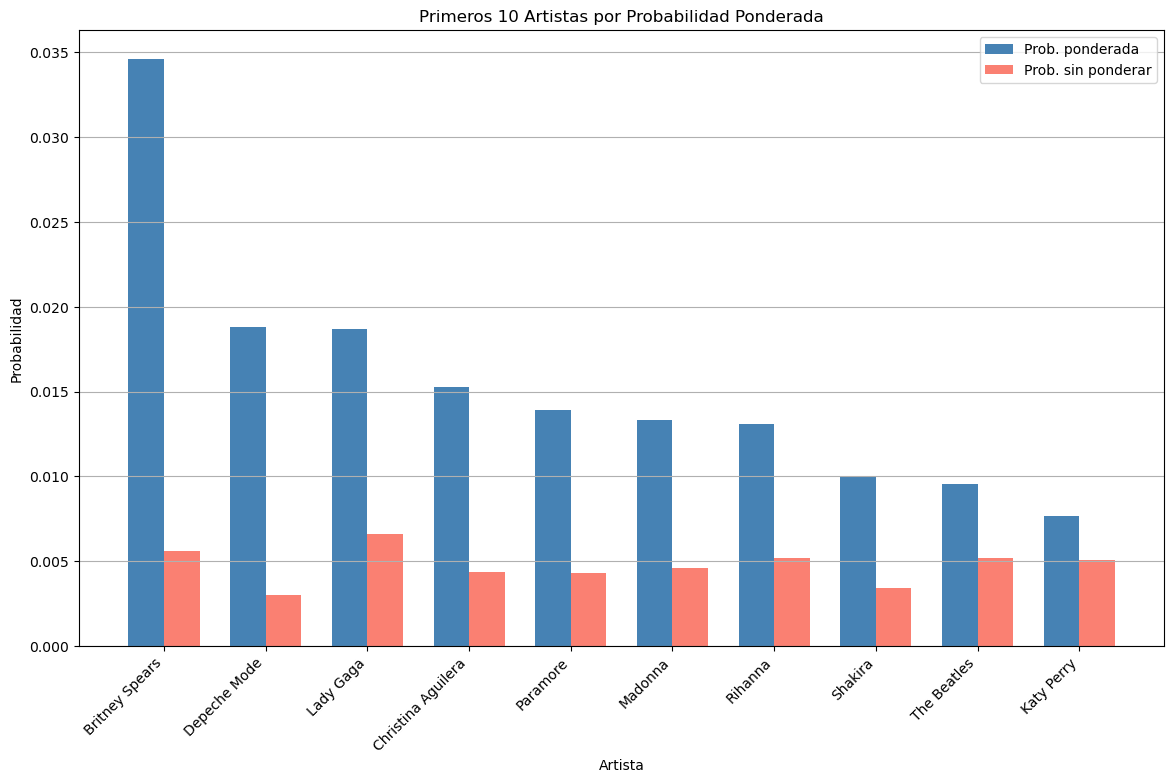

In [15]:
# prob_ponderada en orden descendente y seleccionar los primeros 10
top_10_artists = artists.sort_values(by='prob_ponderada', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists))

# prob_sin_ponderar
plt.bar(index, top_10_artists['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_ponderada
plt.bar([i + bar_width for i in index], top_10_artists['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad Ponderada')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists['artistNAME'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

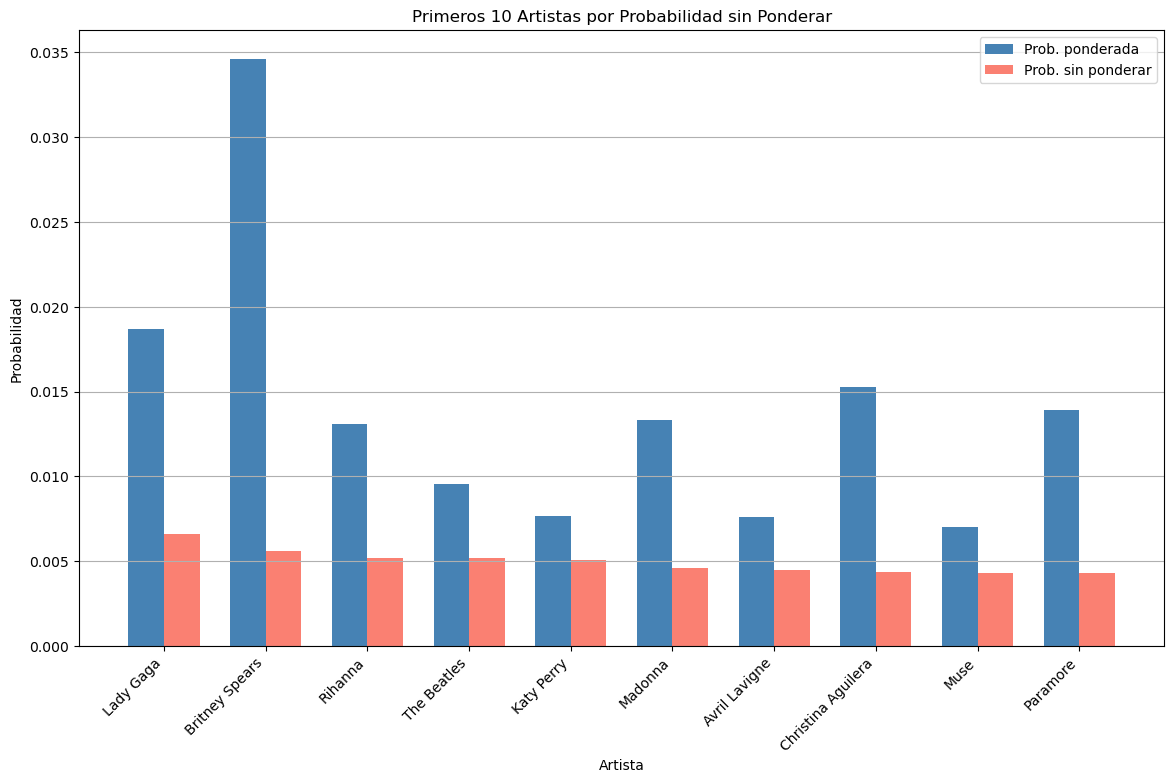

In [16]:
# prob_sin_ponderar en orden descendente y seleccionar los primeros 10
top_10_artists_np = artists.sort_values(by='prob_sin_ponderar', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# Crear gráficos de barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists_np))

# prob_poderada
plt.bar(index, top_10_artists_np['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_sin_ponderar
plt.bar([i + bar_width for i in index], top_10_artists_np['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad sin Ponderar')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists_np['artistNAME'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [17]:
# Utilice este espacio para escribir el código.
df_8 = df[df['userID'] == 8].copy()
df_8.head()

,userID,artistID,nro_reproducciones,artistNAME
1975,8,71,181,Dido
2752,8,89,921,Lady Gaga
3453,8,97,354,Duffy
11322,8,251,235,Whitney Houston
11423,8,257,479,Mariah Carey


In [18]:
len(df_8)

50

In [19]:
total_reproducciones_8 = df_8['nro_reproducciones'].sum()  # Total reproducciones
df_8.loc[:,'porcentaje rep/total'] = df_8['nro_reproducciones']/total_reproducciones_8
df_8 = df_8 .sort_values(by='porcentaje rep/total', ascending=False)
df_8.head(10)

,userID,artistID,nro_reproducciones,artistNAME,porcentaje rep/total
18981,8,334,6291,No Angels,0.173406
18986,8,335,2396,Sandy,0.066044
12634,8,289,2258,Britney Spears,0.062240
18988,8,336,1735,Vanessa Petruo,0.047824
14200,8,295,1425,Beyoncé,0.039279
18989,8,337,1407,Alexander,0.038783
14597,8,296,1039,Sugababes,0.028639
18990,8,338,963,Queensberry,0.026544
2752,8,89,921,Lady Gaga,0.025387
18992,8,339,819,Fady Maalouf,0.022575


In [20]:
df_8['porcentaje rep/total'].sum()

1.0000000000000002

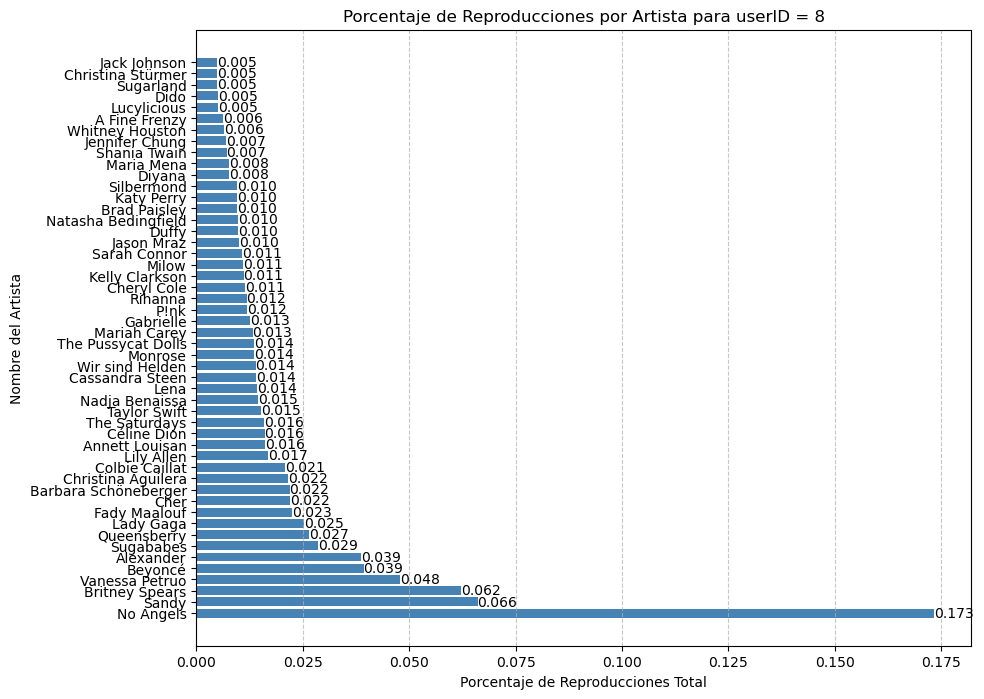

In [21]:
plt.figure(figsize=(10, 8))

plt.barh(df_8['artistNAME'], df_8['porcentaje rep/total'], color='steelblue')

# Configurar etiquetas y título
plt.xlabel('Porcentaje de Reproducciones Total')
plt.ylabel('Nombre del Artista')
plt.title('Porcentaje de Reproducciones por Artista para userID = 8')

# Mostrar los valores en las barras
for index, value in enumerate(df_8['porcentaje rep/total']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [22]:
# Utilice este espacio para escribir el código.
df.head()

,userID,artistID,nro_reproducciones,artistNAME
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran


In [23]:
# Contar el número de userIDs distintos que han escuchado cada artistID
artist_user_counts = df.groupby('artistID')['userID'].nunique().reset_index()
artist_user_counts.rename(columns={'userID': 'user_count'}, inplace=True)

# Unir la cuenta de usuarios de vuelta al DataFrame original
df = df.merge(artist_user_counts, on='artistID', how='left')

# Mostrar el DataFrame actualizado
df.head()

,userID,artistID,nro_reproducciones,artistNAME,user_count
0,2,51,13883,Duran Duran,111
1,4,51,228,Duran Duran,111
2,27,51,85,Duran Duran,111
3,28,51,10,Duran Duran,111
4,62,51,528,Duran Duran,111


In [25]:
user_count_promedio_df = df.groupby('artistID')['user_count'].mean().reset_index()
user_count_promedio_df

,artistID,user_count
0,1,3.0
1,2,12.0
2,3,3.0
3,4,2.0
4,5,2.0
...,...,...
17627,18741,1.0
17628,18742,1.0
17629,18743,1.0
17630,18744,1.0


In [26]:
user_count_promedio_df.rename(columns={'user_count': 'user_count_promedio'}, inplace=True)
user_count_promedio_df = user_count_promedio_df.sort_values(by='user_count_promedio', ascending=False)
user_count_promedio_df = user_count_promedio_df.merge(artists[['artistID', 'artistNAME']], on='artistID', how='left')
user_count_promedio_df.head(10)

,artistID,user_count_promedio,artistNAME
0,89,611.0,Lady Gaga
1,289,522.0,Britney Spears
2,288,484.0,Rihanna
3,227,480.0,The Beatles
4,300,473.0,Katy Perry
5,67,429.0,Madonna
6,333,417.0,Avril Lavigne
7,292,407.0,Christina Aguilera
8,190,400.0,Muse
9,498,399.0,Paramore


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
# Utilice este espacio para escribir el código.

In [ ]:
r_matrix = df.pivot_table(values='user_count', index='userID', columns='artistID')
r_matrix.head()

In [ ]:
r_matrix.shape


In [ ]:
total_nans = r_matrix.isna().sum().sum()

In [ ]:
total_nans

In [ ]:
(r_matrix.shape[0]*r_matrix.shape[1])-total_nans  

In [ ]:
r_matrix_dummy = r_matrix.copy().fillna(0)
r_matrix_dummy.head()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).